In [ ]:
#import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import files
upload = files.upload()

Saving historical_place.csv to historical_place (1).csv


In [ ]:
df = pd.read_csv("historical_place.csv", encoding= 'latin1')
df.head()

,id,name,description,address,latitude,longitude,city_id,opening_hours,rating,user_rating,types,phone_number,createdAt,updatedAt
0,1,Pura Candi Untoroyono,-,"Jl. Karangwungu - Pedan No.354, Nayan, Kalanga...",-7.685243,110.727719,33,Monday: Open 24 hours|Tuesday: Open 24 hours|W...,4.2,122,hindu_temple|tourist_attraction|place_of_worsh...,-,10/13/2023 9:38:53.000 PM,10/13/2023 9:38:53.000 PM
1,2,Wisat Alam Curug Sinom Indah Kalibening,-,"QMMR+497, Area Hutan/Perkebunan, Kasinoman, Ke...",-7.217212,109.690922,28,Monday: 7:00?AM??5:00?PM|Tuesday: 7:00?AM??5...,4.3,222,tourist_attraction|point_of_interest|establish...,0852-2797-8904,10/13/2023 9:38:53.000 PM,10/13/2023 9:38:53.000 PM
2,3,Pura Sonosewu,-,"Sawah, Wirun, Kec. Mojolaban, Kabupaten Sukoha...",-7.601151,110.862978,7,Monday: 9:00?AM??5:00?PM|Tuesday: 9:00?AM??5...,4.5,37,hindu_temple|tourist_attraction|place_of_worsh...,-,10/13/2023 9:38:52.000 PM,10/13/2023 9:38:52.000 PM
3,4,Perpustakaan BBalitvet,-,"Jl. Re. Martadinata Haji Bin Ali No.30, RT.03/...",-6.582899,106.791330,8,Monday: 8:00?AM??4:00?PM|Tuesday: 8:00?AM??4...,4.8,68,museum|tourist_attraction|point_of_interest|es...,(0251) 8339100,10/13/2023 9:38:52.000 PM,10/13/2023 9:38:52.000 PM
4,5,Gereja Katedral Santa Perawan Maria Ratu Rosar...,Early 20th-century Roman Catholic cathedral wi...,"Jl. Pandanaran No.9, Randusari, Kec. Semarang ...",-6.985480,110.409846,4,Monday: 8:00?AM??6:00?PM|Tuesday: 8:00?AM??6...,4.8,3592,tourist_attraction|church|place_of_worship|poi...,(024) 8310036,10/13/2023 9:38:52.000 PM,10/13/2023 9:38:52.000 PM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1570 non-null   int64  
 1   name           1570 non-null   object 
 2   description    1570 non-null   object 
 3   address        1570 non-null   object 
 4   latitude       1570 non-null   float64
 5   longitude      1570 non-null   float64
 6   city_id        1570 non-null   int64  
 7   opening_hours  1570 non-null   object 
 8   rating         1570 non-null   float64
 9   user_rating    1570 non-null   int64  
 10  types          1570 non-null   object 
 11  phone_number   1570 non-null   object 
 12  createdAt      1570 non-null   object 
 13  updatedAt      1570 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 171.8+ KB


     Jumlah sample  Persentase
5.0            451        28.7
4.5            189        12.0
4.3            138         8.8
4.6            131         8.3
4.4            126         8.0
4.0            101         6.4
4.7             90         5.7
4.8             87         5.5
4.2             80         5.1
4.1             58         3.7
4.9             33         2.1
3.0             20         1.3
3.9             17         1.1
3.7             11         0.7
1.0              6         0.4
3.8              6         0.4
2.0              5         0.3
3.5              5         0.3
3.6              4         0.3
3.3              4         0.3
3.4              3         0.2
3.2              2         0.1
2.9              1         0.1
2.7              1         0.1
2.3              1         0.1


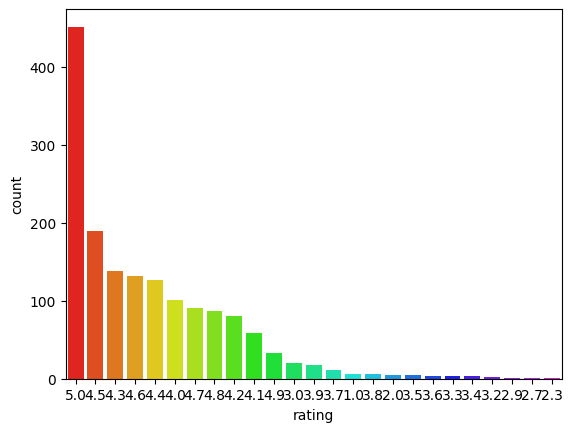

In [ ]:
# Count and percentage of 'rating'
count = df['rating'].value_counts()
percent = 100 * df['rating'].value_counts(normalize=True)

# Create a new DataFrame with counts and percentages
df_counts = pd.DataFrame({'Jumlah sample': count, 'Persentase': percent.round(1)})

# Print the new DataFrame
print(df_counts)

# Plot the countplot
sns.countplot(x='rating', data=df, palette='gist_rainbow', order=df['rating'].value_counts().index)
plt.show()

                                                    Jumlah sample  Persentase
tourist_attraction|point_of_interest|establishment           1201        76.5
tourist_attraction|park|point_of_interest|estab...             72         4.6
park|tourist_attraction|point_of_interest|estab...             52         3.3
museum|tourist_attraction|point_of_interest|est...             44         2.8
mosque|tourist_attraction|place_of_worship|poin...             36         2.3
...                                                           ...         ...
campground|tourist_attraction|lodging|park|poin...              1         0.1
travel_agency|car_rental|tourist_attraction|poi...              1         0.1
tourist_attraction|park|parking|amusement_park|...              1         0.1
travel_agency|car_rental|tourist_attraction|sto...              1         0.1
art_gallery|tourist_attraction|museum|point_of_...              1         0.1

[75 rows x 2 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 [Text(0, 0, 'tourist_attraction|point_of_interest|establishment'),
  Text(1, 0, 'tourist_attraction|park|point_of_interest|establishment'),
  Text(2, 0, 'park|tourist_attraction|point_of_interest|establishment'),
  Text(3, 0, 'museum|tourist_attraction|point_of_interest|establishment'),
  Text(4, 0, 'mosque|tourist_attraction|place_of_worship|point_of_interest|establishment'),
  Text(5, 0, 'tourist_attraction|museum|point_of_interest|establishment'),
  Text(6, 0, 'tourist_attraction|amusement_park|point_of_interest|establishment'),
  Text(7, 0, 'amusement_park|tourist_attraction|point_of_interest|establishment'),
  Text(8, 0, 'tourist_attraction|tra

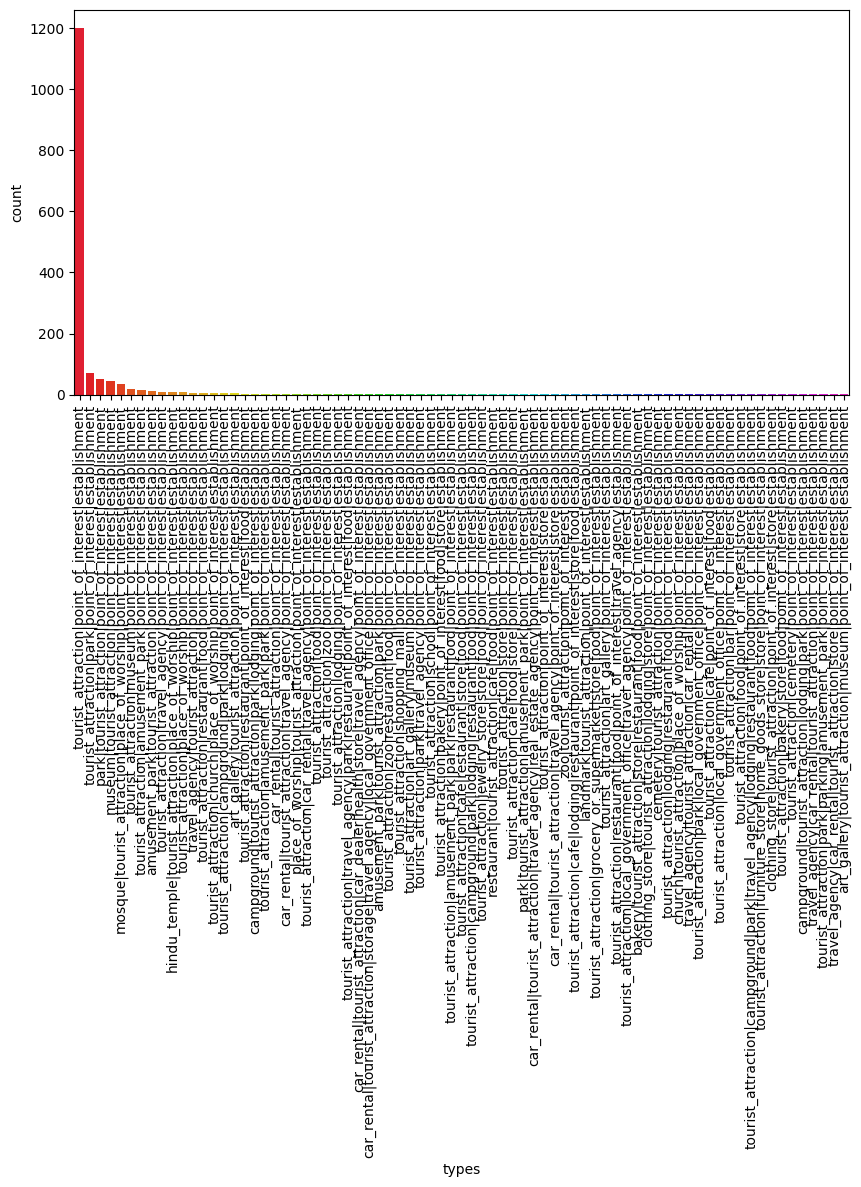

In [ ]:
count = df['types'].value_counts()
percent = 100 * df['types'].value_counts(normalize = True)
df_count = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df_count)
plt.figure(figsize = (10,5))
sns.countplot(x = df['types'], data = df, palette = 'gist_rainbow', order = df['types'].value_counts().index)
plt.xticks(rotation=90)

In [ ]:
df.isnull().sum()

id               0
name             0
description      0
address          0
latitude         0
longitude        0
city_id          0
opening_hours    0
rating           0
user_rating      0
types            0
phone_number     0
createdAt        0
updatedAt        0
dtype: int64

In [ ]:
len(df.id.unique())

1570

In [ ]:
df['types'].unique()

array(['hindu_temple|tourist_attraction|place_of_worship|point_of_interest|establishment',
       'tourist_attraction|point_of_interest|establishment',
       'museum|tourist_attraction|point_of_interest|establishment',
       'tourist_attraction|church|place_of_worship|point_of_interest|establishment',
       'tourist_attraction|amusement_park|point_of_interest|establishment',
       'mosque|tourist_attraction|place_of_worship|point_of_interest|establishment',
       'car_rental|tourist_attraction|point_of_interest|establishment',
       'tourist_attraction|museum|point_of_interest|establishment',
       'tourist_attraction|park|point_of_interest|establishment',
       'park|tourist_attraction|point_of_interest|establishment',
       'restaurant|tourist_attraction|cafe|food|point_of_interest|establishment',
       'tourist_attraction|travel_agency|point_of_interest|establishment',
       'tourist_attraction|jewelry_store|store|food|point_of_interest|establishment',
       'tourist_att

In [ ]:
df.duplicated().sum()

0

In [ ]:
#membuat variabel baru untuk dictianory
place_id = df['id'].tolist()
place_types = df['types'].tolist()
place_name = df['name'].tolist()
place_rating = df['rating'].tolist()

print(len(place_id))
print(len(place_types))
print(len(place_name))

1570
1570
1570


In [ ]:
tourism_recommend = pd.DataFrame({
    'id' : place_id,
    'types' : place_types,
    'name' : place_name,
    'rating' : place_rating
})

tourism_recommend

,id,types,name,rating
0,1,hindu_temple|tourist_attraction|place_of_worsh...,Pura Candi Untoroyono,4.2
1,2,tourist_attraction|point_of_interest|establish...,Wisat Alam Curug Sinom Indah Kalibening,4.3
2,3,hindu_temple|tourist_attraction|place_of_worsh...,Pura Sonosewu,4.5
3,4,museum|tourist_attraction|point_of_interest|es...,Perpustakaan BBalitvet,4.8
4,5,tourist_attraction|church|place_of_worship|poi...,Gereja Katedral Santa Perawan Maria Ratu Rosar...,4.8
...,...,...,...,...
1565,1566,tourist_attraction|park|point_of_interest|esta...,Alun Alun Klaten,4.4
1566,1567,tourist_attraction|point_of_interest|establish...,Pemancingan KAKUNK,5.0
1567,1568,tourist_attraction|point_of_interest|establish...,Sendang Mandong & Gringsing Ocean Park,4.5
1568,1569,mosque|tourist_attraction|place_of_worship|poi...,Miniature Baiturrahman Grand Mosque Aceh Yogya...,4.8


In [ ]:
data = tourism_recommend
data.head()

,id,types,name,rating
0,1,hindu_temple|tourist_attraction|place_of_worsh...,Pura Candi Untoroyono,4.2
1,2,tourist_attraction|point_of_interest|establish...,Wisat Alam Curug Sinom Indah Kalibening,4.3
2,3,hindu_temple|tourist_attraction|place_of_worsh...,Pura Sonosewu,4.5
3,4,museum|tourist_attraction|point_of_interest|es...,Perpustakaan BBalitvet,4.8
4,5,tourist_attraction|church|place_of_worship|poi...,Gereja Katedral Santa Perawan Maria Ratu Rosar...,4.8


In [ ]:
tf = TfidfVectorizer()
tf.fit(data['name'])
tf.get_feature_names_out()

array(['06', '08', '1012', ..., 'zoologi', 'zoologicum', 'zoology'],
      dtype=object)

In [ ]:
#mengubah data dalam bentuk matrix integer
tfdif_matrix = tf.fit_transform(data['name'])
tfdif_matrix.shape

(1570, 2397)

In [ ]:
#mengubah vektor tf-dif dalam bentuk matrix
tfdif_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfdif_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = data.types
).sample(22, axis = 1).sample(10, axis = 0)

,bundaran,street,sudimoro,ketapangdengklok,karya,gilisari,menuju,kluwih,obyek,poong,...,kph,kong,sambisena,kebo,kreteg,sumberadi,bc,pasewaran,kurung,seakong
types,,,,,,,,,,,,,,,,,,,,,
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tourist_attraction|point_of_interest|establishment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cosine_sim = cosine_similarity(tfdif_matrix)
cosine_sim

array([[1.        , 0.        , 0.39387646, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39387646, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index = data['name'], columns = data['name'])
print('Shape : ', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis = 1).sample(10, axis = 0)

Shape :  (1570, 1570)


name,Ledoksambi,Kampung Perca Sindangsari,Taman Kencana,Tempat mancing mujaer betik nila lele wader,Beji Antaboga
name,,,,,
Wediombo Beach,0.0,0.0,0.000000,0.0,0.0
Masjid Santren,0.0,0.0,0.000000,0.0,0.0
Spot cakul,0.0,0.0,0.000000,0.0,0.0
Bendung Boro,0.0,0.0,0.000000,0.0,0.0
Monumen Loko Diesel Bima Kunthing,0.0,0.0,0.000000,0.0,0.0
SAWAH PESANTREN,0.0,0.0,0.000000,0.0,0.0
Curug Putri Kencana,0.0,0.0,0.529407,0.0,0.0
PASAR UMPET DAILY,0.0,0.0,0.000000,0.0,0.0
Puncak Waduk Gajah Mungkur,0.0,0.0,0.000000,0.0,0.0


In [ ]:
#fungsi untuk rekomendasi
def tourism_recommendations(nama_tempat, similarity_data = cosine_sim_df, items = data[['name', 'types', 'rating']], k = 5) :
  index = similarity_data.loc[:, nama_tempat].to_numpy().argpartition(
      range(-1, -k, -1)
  )

  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(nama_tempat, errors = 'ignore')

  result_df = pd.DataFrame(closest).merge(items)

  # Mengurutkan berdasarkan rating terbesar
  result_df = result_df.sort_values(by='rating', ascending=False)

  return result_df.head(k)

In [ ]:
data[data.name.eq('pura candi untoroyono')]

,id,types,name,rating


In [ ]:
tourism_recommendations('Pura Candi Untoroyono')

,name,types,rating
0,Pura Sonosewu,hindu_temple|tourist_attraction|place_of_worsh...,4.5
1,Candi Sari,tourist_attraction|place_of_worship|point_of_i...,4.5
3,Candi Kalasan,tourist_attraction|place_of_worship|point_of_i...,4.5
2,Candi Abang,tourist_attraction|point_of_interest|establish...,4.3
4,Candi Gampingan,tourist_attraction|place_of_worship|point_of_i...,4.1
